In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
np.random.seed(0)

In [3]:
n = 2000 # Number of points to generate.
noise = 0.1 # Amount of noise.
h = 30 * np.random.rand(n, 1); # Height of the sheet.
t = (3*np.pi/2)*(1 + 2*np.random.rand(n, 1)) # Parameter
X = np.hstack((t*np.cos(t), h, t*np.sin(t))) + noise*np.random.rand(n, 3)
print(X)

[[12.12969969 16.52105695 -2.50976906]
 [-8.93169705 21.46100263  2.0939607 ]
 [-9.40287058 18.13908257 -2.02366752]
 ...
 [12.54826883 14.41463789 -0.36717376]
 [ 8.06511143 19.37096578 10.92501385]
 [ 1.85396936 15.05557266  7.48935598]]


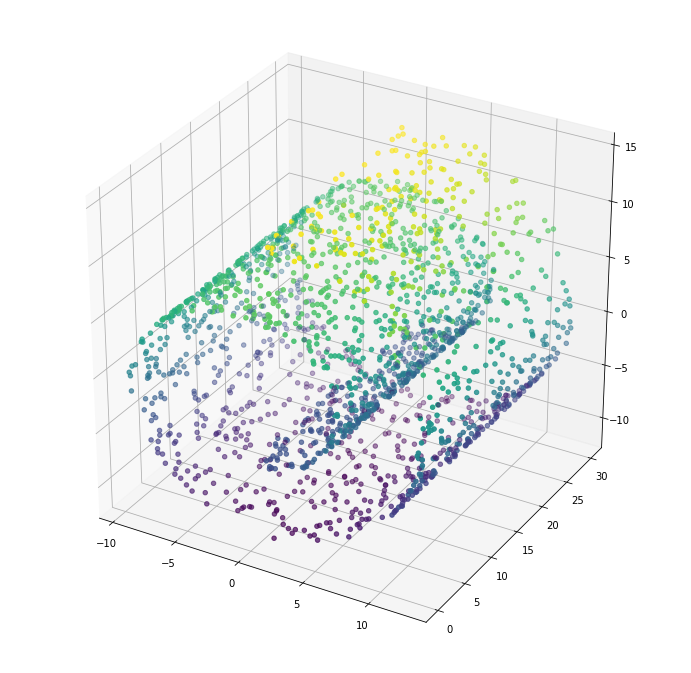

In [4]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax = plt.axes(projection='3d')
x = X[:,0]; y = X[:,1]; z = X[:,2]
ax.scatter3D(x, y, z, c=z)

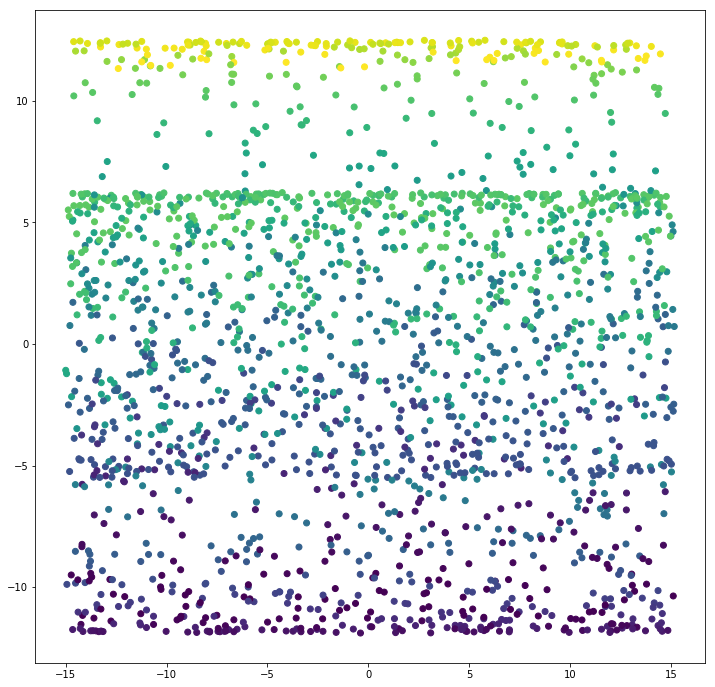

In [5]:
from sklearn.decomposition import PCA
Y = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1], c=z)

In [6]:
from sklearn import metrics
D = metrics.euclidean_distances(X)
D

array([[ 0.        , 22.11740997, 21.59874728, ...,  3.03363083,
        14.32257833, 14.41252164],
       [22.11740997,  0.        ,  5.3114988 , ..., 22.73977513,
        19.26777757, 13.65541736],
       [21.59874728,  5.3114988 ,  0.        , ..., 22.32639651,
        21.77880347, 15.05729374],
       ...,
       [ 3.03363083, 22.73977513, 22.32639651, ...,  0.        ,
        13.12163813, 13.28547696],
       [14.32257833, 19.26777757, 21.77880347, ..., 13.12163813,
         0.        ,  8.30690367],
       [14.41252164, 13.65541736, 15.05729374, ..., 13.28547696,
         8.30690367,  0.        ]])

In [7]:
eps = 10

# Generate final matrix A, and row normalized matrix M. 
A = metrics.pairwise.rbf_kernel(X, gamma=1./(2.*eps))
M = A/A.sum(axis=1, keepdims=True)

# Get the eigenvalues/vectors of M. 
# We normalize by the first eigenvector. 
W, V = np.linalg.eig(M)
V = V/V[:,0]

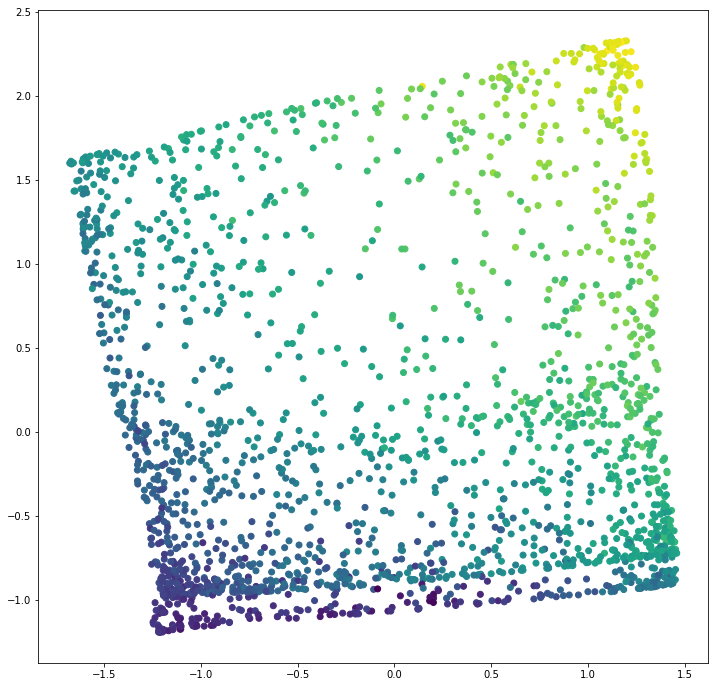

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(V[:,1], V[:,2], c=V[:,0])